# 회귀분석 2(주택가격 데이터셋)

In [22]:
# pip install opencv-python

In [23]:
# 주택 가격 예측: 회귀분석
#회귀분석 : 연속적인 값을 예측
# 예) 과거 기상 데이터를 입력하여 내일의 기온을 예측
# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로
#   주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)

from keras.datasets import boston_housing

# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [24]:
#학습용 404개, 검증용 102개, 13개의 변수

print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [25]:
X_test.shape

(102, 13)

In [26]:
# 독립 변수 목록

# 1. Per capita crime rate.
# 2. Proportion of residential land zoned for lots over 25,000 square feet.
# 3. Proportion of non-retail business acres per town.
# 4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. Nitric oxides concentration (parts per 10 million).
# 6. Average number of rooms per dwelling.
# 7. Proportion of owner-occupied units built prior to 1940.
# 8. Weighted distances to five Boston employment centres.
# 9. Index of accessibility to radial highways.
# 10. Full-value property-tax rate per $10,000.
# 11. Pupil-teacher ratio by town.
# 12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
# 13. % lower status of the population.

# 종속변수 : 주택의 가격(천달러 단위)
#주택가격(10000~50000달러, 1970년대 중반 가격)

y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

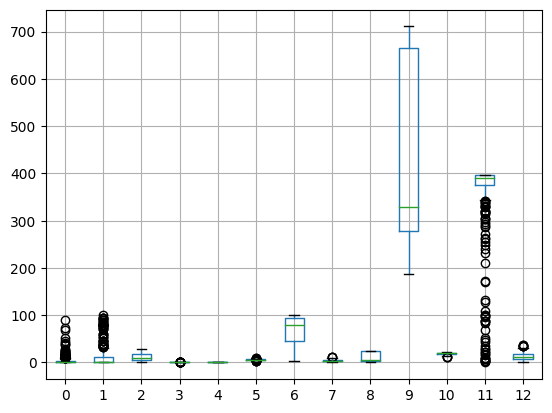

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(X_train).boxplot()

plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
#       패턴 분석
X_train_scaled=scaler.transform(X_train)
#                       변환
X_test_scaled=scaler.transform(X_test)

In [29]:
# 스케일링 하는 이유 : 단위 편차가 있으면 단위가 큰 것에 가중치가 붙을 수 있어 줄여주기위함

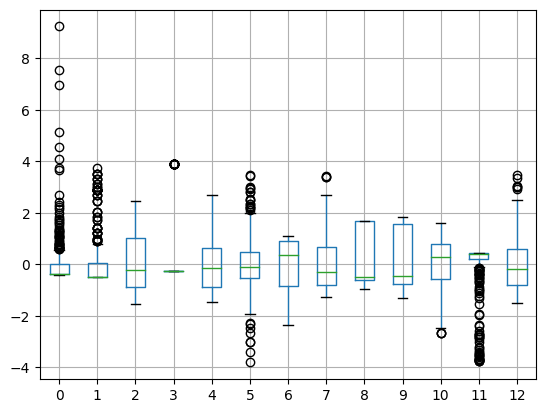

In [30]:
pd.DataFrame(X_train_scaled).boxplot()

plt.show()

In [31]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수
# input data -> {activation function} -> output data
# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수,
#    ReLU 함수
# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서
#    최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음

from keras import models, layers
#64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential()
    #                 신경망
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    #                           활성화함수
    model.add(layers.Dense(64, activation='relu'))

#   input  hidden-1    hidden-2     output
#   13     64          64           1

    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우
    #   활성화 함수가 없는 선형층을 사용함)
    model.add(layers.Dense(1))
    #                  linear = 항등함수

    #mse 손실 함수를 사용하여 컴파일
    #mse : 평균 제곱 오차(mean squared error) -
    #  예측값과 실제값의 거리의 제곱
    #mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    #metrics 평가지표, 검증용 데이터셋으로 평가하는 기준
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                896       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


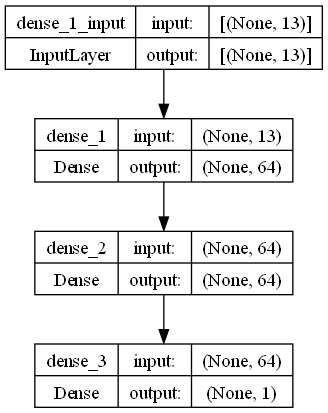

In [32]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [41]:
import matplotlib.pyplot as plt

def train(x_train, y_train, epochs=21):
    for epoch in np.arange(1, epochs):
      hist=model.fit(x_train, y_train)
      #   실제값

      plt.plot(y_train, c='r', label='real')
      plt.plot(model.predict(x_train), c='b', label='pred')
      #   예측값
      plt.legend()

      mae=hist.history['mae'][0]

      plt.title(f"Epoch {epoch:02d}, mae {mae:.2f}")
      # plt.savefig(f"c:/workspace3/img/plot_{epoch:02d}.png")
      plt.savefig(f"img/plot_{epoch:02d}.png")
      plt.clf()

In [42]:
train(X_train_scaled, y_train)

13/13 [==============================] - 0s 998us/step


<Figure size 640x480 with 0 Axes>

In [45]:
import cv2
import glob

img_array=[]
size=(0,0)

# for filename in  sorted(glob.glob('c:/workspace3/img/*.png')):
for filename in  sorted(glob.glob('img/*.png')):
    img=cv2.imread(filename)
    # 이미지 읽기
    height,width,layers=img.shape
    #   세로,가로,채널(흑백0/컬러3)
    size=(width,height)
    img_array.append(img)

out=cv2.VideoWriter('model.mp4', cv2.VideoWriter_fourcc(*'H264'), 0.5, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [44]:
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)
# mini batch -> 7세트

Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 5.5514 - mae: 1.6605
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 5.5696 - mae: 1.6726
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 5.6754 - mae: 1.6919
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 5.6356 - mae: 1.6788
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 5.6356 - mae: 1.6869
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 5.6269 - mae: 1.6759
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 5.5042 - mae: 1.6683
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 5.4728 - mae: 1.6491
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 5.6476 - mae: 1.6847
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 5.5420 - mae: 1.6466
Epoch 11/100
7/7 [==============================] - 0s 1ms/step - loss: 5.6098 

In [37]:
# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(mse)
print(mae) 

4/4 [==============================] - 0s 1ms/step - loss: 18.2738 - mae: 2.7565
18.273849487304688
2.756538152694702


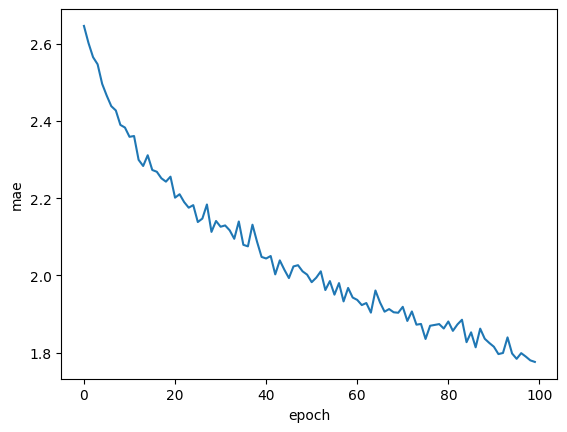

In [38]:
plt.plot(hist.history["mae"])

plt.ylabel("mae")
plt.xlabel("epoch")

plt.show()